In [177]:
#test file downlaoded from https://bankrec.westpac.com.au/docs/statements/mt940/

import mt940
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

transactions = mt940.parse('input.sta')

input=[]
for t in transactions:
    input.append(t.data)

df=pd.DataFrame(input)
df['amount']=df['amount'].apply(lambda x:pd.to_numeric(x.amount))
df['date']=df['date'].apply(lambda x:pd.to_datetime(str(x)))
df=df.convert_dtypes()
df['sum']=[(df[df['date']<=e])['amount'].sum() for e in df['date']]
df.sort_values(by='date', inplace=True)
df



,status,funds_code,amount,id,customer_reference,bank_reference,extra_details,currency,date,entry_date,guessed_entry_date,transaction_details,sum
0,D,None,-5000,F803,Payer Name This,0802198032003412,is the beneficiary descrip,AUD,2019-02-08,2019-02-08,2019-02-08,WITHDRAWAL 2003412 Payer Name This is the b...,19220
1,D,None,-8000,F817,Payee Name This,0802198171413245,is the beneficiary descrip,AUD,2019-02-08,2019-02-08,2019-02-08,WITHDRAWAL-OSKO PAYMENT 1413245 Payee Name Thi...,19220
2,D,None,-780,F870,2413480 07 Feb 2,0802198701413245,019 MD06 Requested by paye,AUD,2019-02-08,2019-02-08,2019-02-08,WITHDRAWAL-PAYMENT RETURN 2413480 07 Feb 2019 ...,19220
3,D,None,-4000,F874,2413481 07 Feb 2,0802198741413245,019 MD06 Requested by paye,AUD,2019-02-08,2019-02-08,2019-02-08,WITHDRAWAL-OSKO PAYMENT RETURN 2413481 07 Feb ...,19220
4,C,None,6000,F886,Payee Name This,0802198862056575,is the beneficiary descrip,AUD,2019-02-08,2019-02-08,2019-02-08,DEPOSIT 2056575 Payee Name This is the benefic...,19220
5,C,None,5000,F887,Payer Name This,0802198872003412,is the beneficiary descrip,AUD,2019-02-08,2019-02-08,2019-02-08,DEPOSIT-OSKO PAYMENT 2003412 Payer Name Thi...,19220
6,C,None,5000,F891,1286995 05 Feb 2,0802198911413245,019 BE05 Payee is not fami,AUD,2019-02-08,2019-02-08,2019-02-08,DEPOSIT-PAYMENT RETURN 1286995 05 Feb 2019 ...,19220
7,C,None,8000,F892,1286995 05 Feb 2,0802198921413245,019 BE05 Payee is not fami,AUD,2019-02-08,2019-02-08,2019-02-08,DEPOSIT-OSKO PAYMENT RETURN 1286995 05 Feb ...,19220
8,C,None,5000,F895,2003412 07 Feb 2,0802198951413245,019 AC07 Account closed En,AUD,2019-02-08,2019-02-08,2019-02-08,DEPOSIT-PAYMENT REVERSAL 2003412 07 Feb 201...,19220
9,C,None,8000,F896,5642137 07 Feb 2,0802198961413245,019 AC07 Account closed En,AUD,2019-02-08,2019-02-08,2019-02-08,DEPOSIT-OSKO PAYMENT REVERSAL 5642137 07 Fe...,19220


0    19220
1    19220
2    19220
3    19220
4    19220
5    19220
6    19220
7    19220
8    19220
9    19220
Name: sum, dtype: int64


<BarContainer object of 10 artists>

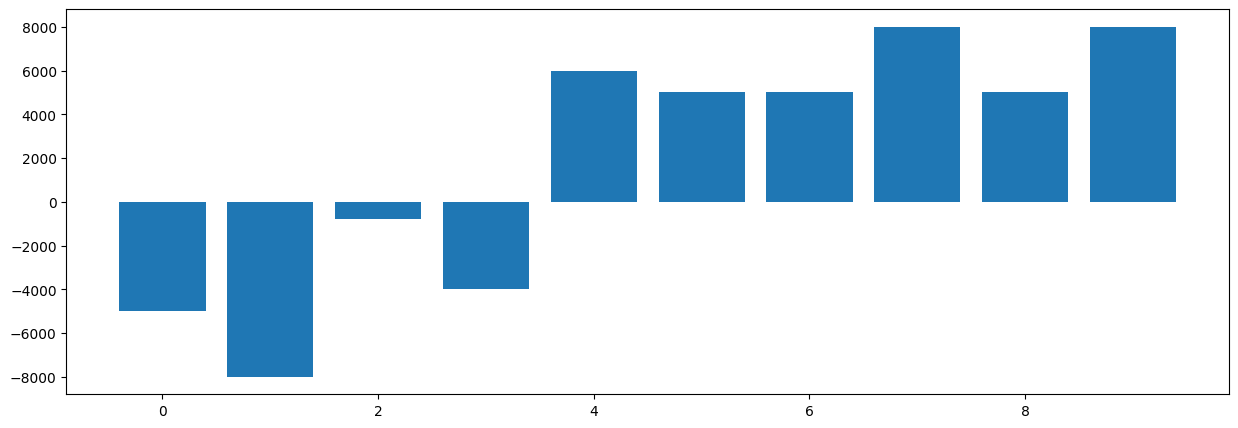

In [178]:
plt.figure(figsize=(15,5))
df2=df
print(df2['sum'])
plt.bar(np.arange(len(df2)), df2['amount'])